In [ ]:
#!pip install scikit-plot

In [ ]:
#!pip install xgboost

In [5]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import xgboost
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pickle
from joblib import dump

In [6]:
url = 'https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_ml_features.csv'

In [7]:
df = pd.read_csv(url)

In [8]:
X = df.drop(columns=['PRICE'],axis =1).values
y = df['PRICE'].values

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb = xgboost.XGBRegressor(random_state=42)

In [ ]:
params_xgb = {"colsample_bytree" : [0.6],
              "n_estimators" : [150,155,160,165,170,175,180,185,190,195,200]
              }



In [ ]:
gsearch1 = GridSearchCV(estimator = xgb, param_grid = params_xgb, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [ ]:
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.6, 'n_estimators': 160}
best score
0.8536532349341867


In [11]:
xgb = XGBRegressor(colsample_bytree=0.6, n_estimators=160, random_state = 42)

In [12]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
prediction = xgb.predict(X_test)

In [14]:
r2_score(y_test, prediction)

0.8642388817525122

In [15]:
mean_squared_error(y_test, prediction)

0.03529801513470294

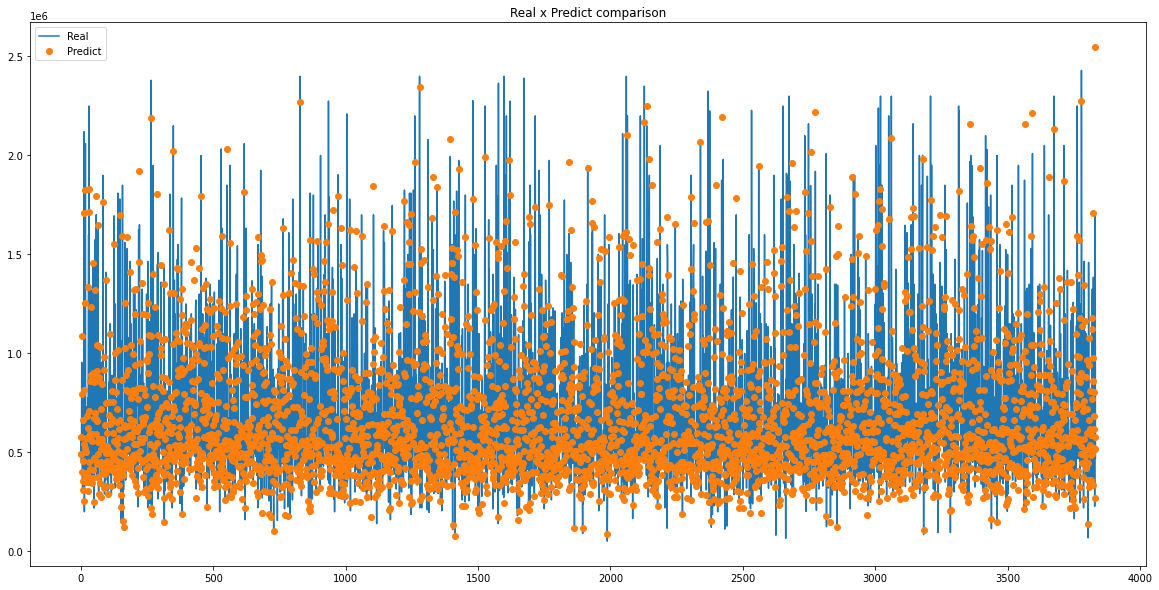

In [16]:
plt.figure(figsize=(20,10))
plt.plot(np.exp(y_test))
plt.plot(np.exp(prediction), 'o')

plt.legend(['Real', 'Predict'], loc='upper left')
plt.title('Real x Predict comparison')
plt.show()

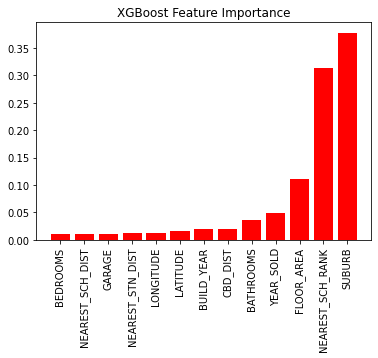

In [17]:
skplt.estimators.plot_feature_importances(xgb, feature_names=df.drop(columns=['PRICE'],axis =1).columns,
                                         title="XGBoost Feature Importance",
                                         x_tick_rotation=90, order="ascending");

In [18]:
pickle.dump(xgb, open('xgb.sav', 'wb'))
dump(xgb, 'xgb.pkl')

['xgb.pkl']

## TESTES

In [ ]:
#X[0:1]
teste1 = ([[ 1.31514882e+01,  3.00000000e+00,  2.00000000e+00,
             2.00000000e+00,  4.93447393e+00,  2.01300000e+03,
             2.69000000e+04,  8.49699048e+00, -3.21934703e+01,
             1.15859554e+02,  1.70916095e+00,  1.29000000e+02,
             2.01900000e+03]])

#X_test[0:1] - scaled
teste2 = ([[-0.33399557, -0.89997173, -1.46541764,  0.81950955, -1.23379563,
             0.23218144, -0.46774828, -0.68202706,  0.24561533,  1.13650472,
             0.35657949, -0.49341297,  0.02841612]])

teste3 = ([[ 1.70000000e+05,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
            3.95124372e+00,  1.87000000e+03,  1.30000000e+03,  3.82864140e+00,
            -3.24555500e+01,  1.15675834e+02, -2.65926004e+00,  1.00000000e+00,
            1.98800000e+03]])

In [ ]:
teste1 = scaler.transform(teste1)
teste3 = scaler.transform(teste3)

In [ ]:
pred1 = xgb.predict(teste1)
pred2 = xgb.predict(teste2)
pred3 = xgb.predict(teste3)

pred1 = np.exp(pred1)
pred2 = np.exp(pred2)
pred3 = np.exp(pred3)

In [ ]:
print(pred1, pred2, pred3)

[399610.6] [394448.3] [148244.06]
